# Paisaje Montañoso de Mandelbrot #

### Introducción ###
Los paisajes fractales representan el primer intento de añadir una tercera dimensión a las estructuras fractales.
El método consiste en añadir un tercer eje cartesiano (z) a los ejes de abscisas (x) y ordenadas (y) de una estructura fractal plana, que viene dado de forma natural por la tasa de escape (número de ciclos de recursión necesarios para alcanzar algún valor umbral) o por el valor alcanzado por el módulo de una función recursiva tras un número adecuado de ciclos que caracterizan cada punto del fractal 2D correspondiente.

### Objetivos ###
- Realizar un paisaje montañoso empleando la ecuación de Mandelbrot.
- Poner en práctica el conocimiento adquirido en el módulo 2 del curso.

### Modelo que representa ###
El conjunto de Mandelbrot es el más estudiado de los fractales. Se conoce así en honor al matemático Benoît Mandelbrot (1924-2010), que investigó sobre él en los años setenta.

Este conjunto se define en el plano complejo fijando un número complejo c cualquiera. A partir de c, se construye una sucesión por recursión:

\begin{cases}z_{0}=0\in \mathbb {C} &{\text{(término inicial)}}\qquad \\z_{n+1}=z_{n}^{2}+c&{\text{(sucesión recursiva)}}\end{cases}

Si esta sucesión queda acotada, entonces se dice que c pertenece al conjunto de Mandelbrot, y si no, queda excluido del mismo.

Por ejemplo, si c = 1 obtenemos la sucesión 0, 1, 2, 5, 26, …, que diverge. Como no está acotada, 1 no es un elemento del conjunto de Mandelbrot.

En cambio, si c = –1 obtenemos la sucesión 0, –1, 0, –1, …, que sí es acotada y, por tanto, –1 sí pertenece al conjunto de Mandelbrot.

### Solución del problema ###
Lo primero que realizamos es importar las bibliotecas con las que vamos a trabajar, empezando por Matplotlib y dentro de esta encontramos módulos que emplearemos para realizar la figura en 3D (Axes3D y cm para los colores). 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # importar el módulo de colores
import numpy as np

A continuación, estableceremos como queremos ver la figura, desde la orientación de la vista (que ángulo y qué elevación), la distancia desde el punto de vista (distancia entre el punto de enfoque y la impresión) hasta el color de fondo que queremos observar en la figura.

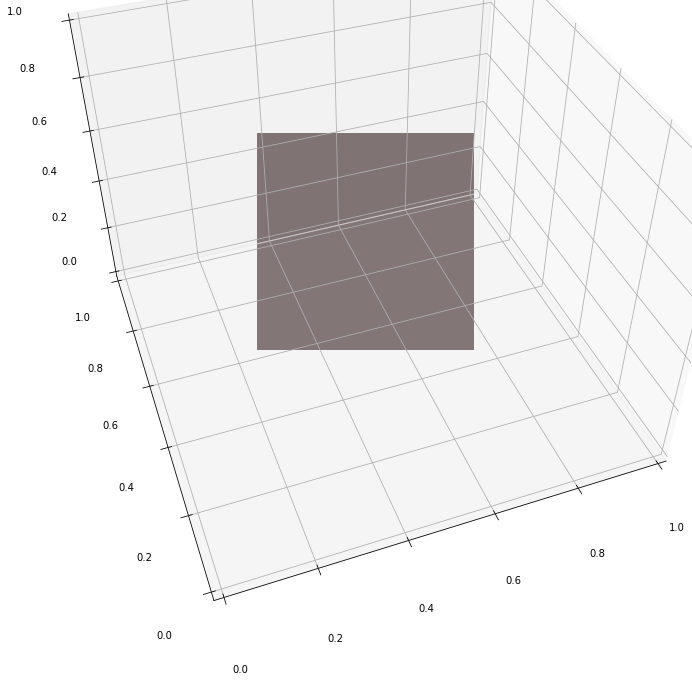

In [2]:
fig = plt.figure() # establecer el entorno de la figura 3D
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-110,elev=40) # establecer la orientación de la vista
ax.dist = 3.0 # establecer la distancia del punto de vista
ax.set_facecolor([.1,0.0,0.0]) # establecer el color de fondo

Posterior a esto, vamos a definir las condiciones con las que vamos a trabajar: el número de ciclos a realizar, los valores de dx y dy, así como, las dimensiones de lo que veremos al imprimir la figura y el número de pixeles. 

In [3]:
n = 10 # número de ciclos a realizar
dx = -0.7 # establecer el cambio de parámetro en x inicial
dy = 0.0 # establecer el cambio de parámetro en y inicial
L = 4 # lado del cuadrado
M = 500 # número de pixeles

Una vez teniendo las condiciones de trabajo, definimos la amortiguación de escala en la función de elevación. 

In [4]:
def f(Z): # definir la amortiguación de escala de la función de elevación:
    return np.e**(-np.abs(Z))

Ya que tenemos definida la amotiguación, procedemos a crear los valores de x,y de forma espaciada en los intervalos definidos por las condiciones de trabajo, las matrices de cero valores para la partida del plano y la elevación, así como, el área del plano complejo.

In [5]:
x = np.linspace(-L+dx,L+dx,M) # matriz de variables x
y = np.linspace(-L+dy,L+dy,M) # matriz de variables y
X,Y = np.meshgrid(x,y) # grid del área del cuadrado
Z = np.zeros(M) # área de puntos de partida del plano
W = np.zeros((M,M)) # matriz cero de valores de elevación
C = X + 1j*Y # área del plano complejo

Teniendo todo lo anterior, pasamos a realizar un ciclo de recursividad donde empleando la ecuación de Mandelbrot nos da el valor de z para completar las coordenadas de la figura en 3D.

In [6]:
for k in range(1,n+1): # ciclo de recursividad
    ZZ = Z**2 + C # ecuación de Mandelbrot
    Z = ZZ
    W = f(Z)

C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/4065717932.py:2: RuntimeWarning: overflow encountered in square
  ZZ = Z**2 + C # ecuación de Mandelbrot
C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/4065717932.py:2: RuntimeWarning: invalid value encountered in square
  ZZ = Z**2 + C # ecuación de Mandelbrot
C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/1800130538.py:2: RuntimeWarning: overflow encountered in absolute
  return np.e**(-np.abs(Z))


Por último, definimos los límites en x,y,z de lo que vamos a ver en la figura una vez impresa, así como, ajustar para que no aparezcan los ejes al imprimir la figura, previo a escribir que queremos imprimir la superficie montañosa en un solo conjunto.

In [7]:
ax.set_xlim(dx-L,dx+L) # límites en x
ax.set_zlim(dy-L,dy+L) # límites en y
ax.set_zlim(-L,2*L) # límites en z
ax.axis("off") # no imprimir los ejes
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap="pink") # imprimir superficie en conjunto
plt.show()

### Visualización de la solución del problema ###
Teniendo en conjunto todo el código podemos observar lo siguiente:

C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/3118084107.py:24: RuntimeWarning: overflow encountered in square
  ZZ = Z**2 + C # ecuación de Mandelbrot
C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/3118084107.py:24: RuntimeWarning: invalid value encountered in square
  ZZ = Z**2 + C # ecuación de Mandelbrot
C:\Users\dangt\AppData\Local\Temp/ipykernel_17640/3118084107.py:14: RuntimeWarning: overflow encountered in absolute
  return np.e**(-np.abs(Z))


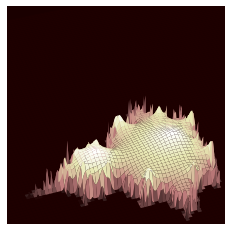

In [8]:
fig = plt.figure() # establecer el entorno de la figura 3D
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-110,elev=40) # establecer la orientación de la vista
ax.dist = 2.0 # establecer la distancia del punto de vista
ax.set_facecolor([.1,0.0,0.0]) # establecer el color de fondo

n = 10 # número de ciclos a realizar
dx = -0.7 # establecer el cambio de parámetro en x inicial
dy = 0.0 # establecer el cambio de parámetro en y inicial
L = 4 # lado del cuadrado
M = 500 # número de pixeles

def f(Z): # definir la amortiguación de escala de la función de elevación
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # matriz de variables x
y = np.linspace(-L+dy,L+dy,M) # matriz de variables y
X,Y = np.meshgrid(x,y) # grid del área del cuadrado
Z = np.zeros(M) # área de puntos de partida del plano
W = np.zeros((M,M)) # matriz cero de valores de elevación
C = X + 1j*Y # área del plano complejo

for k in range(1,n+1): # ciclo de recursividad
    ZZ = Z**2 + C # ecuación de Mandelbrot
    Z = ZZ
    W = f(Z)
    
ax.set_xlim(dx-L,dx+L) # límites en x
ax.set_zlim(dy-L,dy+L) # límites en y
ax.set_zlim(-L,2*L) # límites en z
ax.axis("off") # no imprimir los ejes
ax.plot_surface(X, Y, W, rstride=3, cstride=3, cmap="pink") # imprimir superficie en conjunto
plt.show()

### Conclusiones ###
Diseñar e imprimir un paisaje montañoso de fractales nos ayudó a emplear el conocimiento previo que teníamos de fractales, así como, el empleo de nuevos usos para la biblioteca matplotlib; teniendo un cambio que es la ecuación de Mandelbrot con la cual pudimos construir cada punto (x, y, z) del plano complejo para crear el conjunto de Mandelbrot en forma de un paisaje montañoso.

### Referencias ###
- Brooks, Robert; y Matelski, Peter: «The dynamics of 2-generator subgroups of PSL(2,C)», en Kra, Irwin; y Maskit, Bernard (eds.): Riemann surfaces and related topics: proceedings of the 1978 Stony Brook conference. Princeton (New Jersey): Princeton University Press, 1981.
- Strumia (2019) Chance and order: fractals, cellular automata and biology (year 2019).
- (2014)”Paisaje fractal. Disponible en: https://hmong.es/wiki/Fractal_landscape .[Consultado el 24 de abril de 2022, a las 17:35 hrs.]
- Addams, M.(2016)”Paisaje Fractal”. Disponible en: https://prezi.com/i2buxzkmodz4/paisaje-fractal/ .[Consultado el 24 de abril de 2022, a las 18:04 hrs.]

#### Integrantes que realizaron #####
- Jorge Luis González de la Cerda
- José Carlos López Aguilar
- José Daniel Gutiérrez García